<div class="alert alert-block alert-warning">

# Wichtige Hinweise
**Bitte lesen Sie folgende Hinweise sorgfältig**

- Dies ist das Übungsblatt. Lösen Sie dieses erst, wenn Sie das Beispiels-Blatt (3a) gelesen und gelöst haben!
- Öffen Sie sowohl dieses Blatt wie auch das Beisipels-Blatt nebeneinander, damit Sie sich für die Aufgaben an den Beispielen orientieren können (falls Sie Hilfe benötigen, wenden Sie sich an Herrn Wendl).
- Lesen Sie den gesamten Text aufmerksam und vervollständigen Sie jeden Code-Block in dieser Datei.
</div>

<div class="alert alert-block alert-success">

Viel Erfolg beim Lösen der Übungen! :)
</div>

In [2]:
# benötigte Bibliotheken importieren
import pandas as pd # pandas für Datenmanipulation
import matplotlib.pyplot as plt  # matplotlib für Datenvisualisierung
import statsmodels.formula.api as smf # statsmodels für statistische Modelle, insbesondere OLS

# Einfache lineare Regression

In [9]:
# Aufgabe 1: Daten einlesen
# Lesen Sie die CSV-Datei "Data/police_vs_crime.csv" ein und speichern Sie sie in einem DataFrame. Zeigen Sie die ersten 5 Zeilen des DataFrames an.
df = pd.read_csv("Data/police_crime.csv")
df.head()

,Polizeistreifen,Straftaten
0,5,5.915402
1,4,4.328751
2,4,3.470240
3,5,5.513267
4,5,5.097078


Text(0.5, 1.0, 'Straftaten vs. Polizeistreifen')

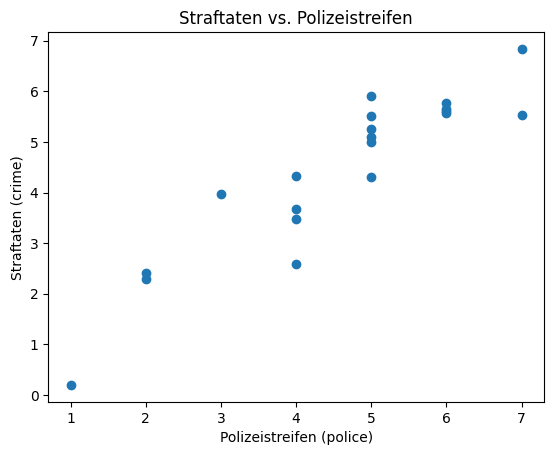

In [11]:
# Aufgabe 2: Zeigen Sie die Polizeistreifen und die Straftaten in einem Streudiagramm an.
plt.scatter(df["Polizeistreifen"], df["Straftaten"])
plt.xlabel("Polizeistreifen (police)")
plt.ylabel("Straftaten (crime)")
plt.title("Straftaten vs. Polizeistreifen")

Welches sind die abhängige und unabhängige Variable in diesen Daten?

**Antwort**:
- ...
- ...

Erkennen Sie einen linearen Trend (= eine lineare Tendenz) in diesen Daten?

**Antwort**:

In [15]:
# Finden Sie eine optimale Regressionslinie für die Daten 
lm = smf.ols(formula="Polizeistreifen ~ Straftaten", data=df).fit()

steigung = lm.params["Straftaten"]
achsenabschnitt = lm.params["Intercept"]

print("Steigung:", steigung, "Achsenabschnitt:", achsenabschnitt)

Steigung: 0.9294160034911453 Achsenabschnitt: 0.46421478385596066


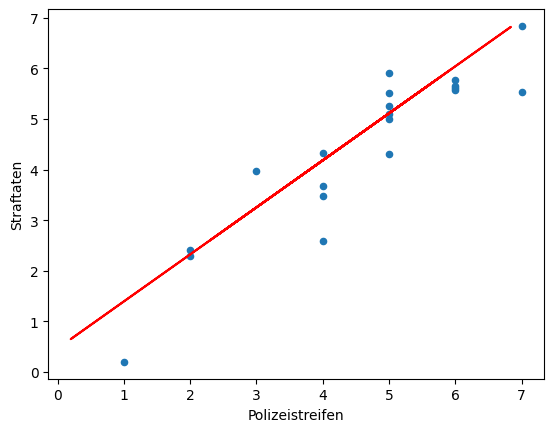

In [17]:
# Zeichnen Sie die Regressionslinie in das Streudiagramm ein
df.plot.scatter(x="Polizeistreifen", y="Straftaten")
x = df["Straftaten"]
y = steigung * x + achsenabschnitt
plt.plot(x, y, color="red", label="Regressionslinie")
